# Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
#import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os

from keras.preprocessing.image import ImageDataGenerator

# creating a base directory

In [3]:
base_dir = 'test_set'

img_size = 224
batch = 32

# Creating a data augmentor and datesets

In [4]:

training_set = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip=True, 
                                  validation_split=0.2) 

test_set = ImageDataGenerator(rescale=1. / 255, 
                              validation_split=0.2) 

# Create datasets 
training_set = training_set.flow_from_directory(base_dir, 
                                                target_size=( img_size, img_size), 
                                                subset='training', 
                                                batch_size=batch) 
test_set = test_set.flow_from_directory(base_dir,
                                        target_size=(img_size, img_size), 
                                        subset='validation', 
                                        batch_size=batch) 


Found 4317 images belonging to 12 classes.
Found 1073 images belonging to 12 classes.


In [5]:
len(training_set)

135

In [6]:
len(test_set)

34

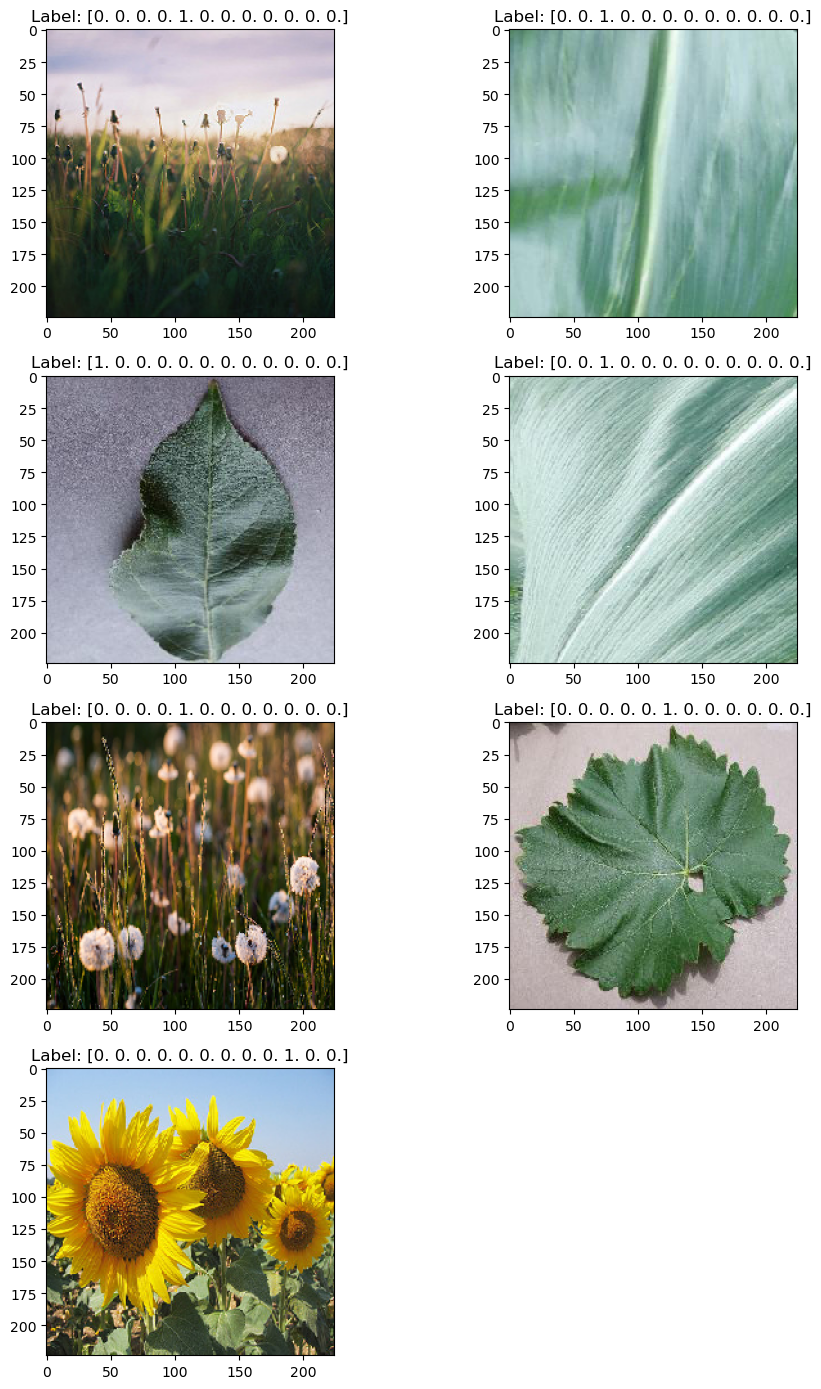

In [14]:
import matplotlib.pyplot as plt

# Assuming test_set is a DirectoryIterator from ImageDataGenerator.flow_from_directory
plt.figure(figsize=(10, 14))  # Adjusted figsize for 7 images

num_images_to_display = 7
image_batch, label_batch = next(test_set)

for i in range(num_images_to_display):
    ax = plt.subplot(4, 2, i + 1)  # Adjusted layout for 7 images
    plt.imshow(image_batch[i])
    plt.title(f"Label: {label_batch[i]}")

plt.tight_layout()  # Adjust layout spacing
plt.show()


#  modelling starts using a CNN 

In [15]:
model = Sequential() 

In [16]:
model.add(Conv2D(filters=64,
                 kernel_size=(5, 5),
                 padding='same', 
                 activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 


In [17]:
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3), 
                 padding='same', activation='relu')) 

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 


In [18]:
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3), 
                 padding='same', activation='relu')) 

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

In [19]:
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2))) 

In [20]:
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(5, activation="softmax")) 

# summarizing the model built

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 28, 28, 64)       

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Model architecture
model = Sequential()

model.add(Conv2D(filters=64,
                 kernel_size=(5, 5),
                 padding='same', 
                 activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(512, activation='relu'))  
model.add(Dense(16, activation="softmax"))  # Adjust to the number of classes in your dataset

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\PN\\Desktop\\flowers\\training_set', 
                                                target_size=(224, 224),
                                                batch_size=8,
                                                class_mode='sparse')

test_set = test_datagen.flow_from_directory('C:\\Users\\PN\\Desktop\\flowers\\test_set',
                                            target_size=(224, 224),
                                            batch_size=8,
                                            class_mode='sparse')

# Reduce learning rate during training
def lr_scheduler(epoch):
    return 0.001 * 0.95**epoch

lr_schedule = LearningRateScheduler(lr_scheduler)

# Train the model with learning rate scheduler
history = model.fit(training_set, validation_data=test_set, epochs=30, batch_size=8, callbacks=[lr_schedule])


Found 3289 images belonging to 12 classes.
Found 5390 images belonging to 12 classes.
Epoch 1/30
412/412 [==============================] - 219s 529ms/step - loss: 1.7061 - accuracy: 0.3718 - val_loss: 1.3333 - val_accuracy: 0.5471 - lr: 0.0010
Epoch 2/30
412/412 [==============================] - 224s 544ms/step - loss: 1.0516 - accuracy: 0.6014 - val_loss: 1.1810 - val_accuracy: 0.5616 - lr: 9.5000e-04
Epoch 3/30
412/412 [==============================] - 225s 547ms/step - loss: 0.8534 - accuracy: 0.6823 - val_loss: 0.8724 - val_accuracy: 0.6959 - lr: 9.0250e-04
Epoch 4/30
412/412 [==============================] - 226s 548ms/step - loss: 0.7092 - accuracy: 0.7382 - val_loss: 0.7809 - val_accuracy: 0.7419 - lr: 8.5737e-04
Epoch 5/30
412/412 [==============================] - 307s 745ms/step - loss: 0.5989 - accuracy: 0.7844 - val_loss: 0.7231 - val_accuracy: 0.7597 - lr: 8.1451e-04
Epoch 6/30
412/412 [==============================] - 305s 740ms/step - loss: 0.5499 - accuracy: 0.7996

In [23]:
scores=model.evaluate(test_set)

674/674 [==============================] - 84s 124ms/step - loss: 1.0712 - accuracy: 0.8668


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

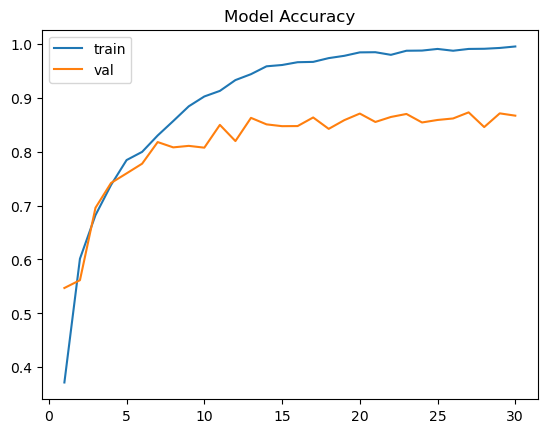

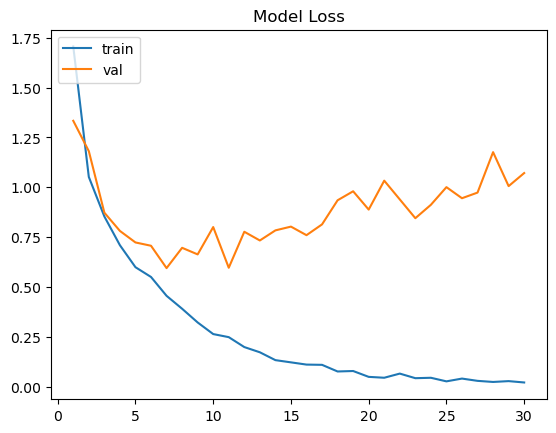

In [51]:
def plot_lc(history, epochs):
    epoch_range = range(1, epochs + 1)

    # Plot accuracy
    plt.plot(epoch_range, history.history['accuracy'][:epochs], label='Training Accuracy')
    plt.plot(epoch_range, history.history['val_accuracy'][:epochs], label='Validation Accuracy')
    plt.title("Model Accuracy")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(epoch_range, history.history['loss'][:epochs], label='Training Loss')
    plt.plot(epoch_range, history.history['val_loss'][:epochs], label='Validation Loss')
    plt.title("Model Loss")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()

# Call the function with the appropriate history and epochs values
epochs = 30
plot_lc(history, epochs)


# Plotting the model

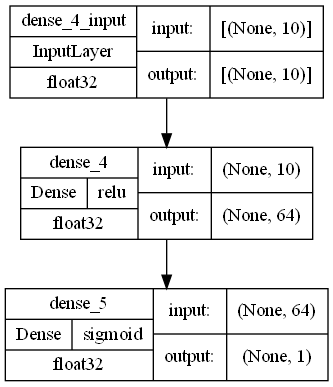

In [52]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creating a sample model
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Plot the model
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


In [53]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', metrics=['accuracy']) 


# defining paths for the datasets

In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have a directory structure for your dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the paths to your training and test datasets
train_dir = r'C:\Users\PN\Desktop\flowers\training_set'
test_dir = r'C:\Users\PN\Desktop\flowers\test_set'

In [55]:
# Set your batch size
your_batch_size = 32  # Adjust this to your preferred batch size

# Creating generators

In [56]:
# Create generators for reading and augmenting data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),  # specify the size of your input images
    batch_size=your_batch_size,
    class_mode='categorical'  # adjust according to your problem (binary or categorical)
)

Found 3289 images belonging to 12 classes.


In [57]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=your_batch_size,
    class_mode='categorical'
)

Found 5390 images belonging to 12 classes.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
# Add more layers as needed for your specific architecture

# Compile the model and then use model.fit()


In [61]:
from tensorflow.keras.models import load_model

# Load model
saved_model = load_model('plant.h5')

# Compile the loaded model
saved_model.compile(optimizer='adam',  # Replace with your original optimizer
                    loss='categorical_crossentropy',  # Replace with your original loss function
                    metrics=['accuracy'])  # Replace with your original metrics

model.save('plant.keras')
loaded_model = load_model('plant.keras')


In [62]:
# Assuming you have already defined and configured your ImageDataGenerator and flow_from_directory
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Access class indices
class_indices = train_generator.class_indices

# Print class indices
print(class_indices)


Found 3289 images belonging to 12 classes.
{'apple': 0, 'citrus': 1, 'corn': 2, 'daisy': 3, 'dandelion': 4, 'grape': 5, 'palm': 6, 'potato': 7, 'rose': 8, 'sunflower': 9, 'tomato': 10, 'tulip': 11}


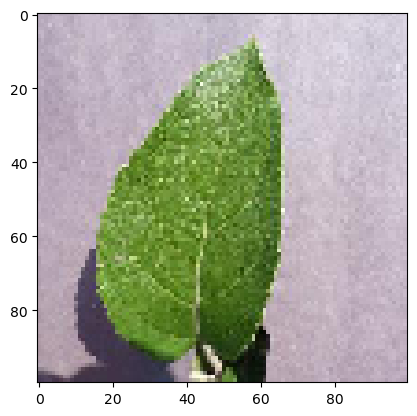

Image Name: AppleHealthy(524)
1/1 [==============================] - 0s 43ms/step
[[[[  0.          0.         78.65923   ...   0.          0.
      7.8876047]
   [  0.          0.         79.86871   ...   0.          0.
      3.3288412]
   [  0.          0.         82.83082   ...   0.          0.
      7.515461 ]
   ...
   [  0.          0.         98.44537   ...   0.          0.
      9.655596 ]
   [  0.          0.         96.148315  ...   0.          0.
      6.49392  ]
   [  0.          0.        102.16009   ...   0.          0.
      7.8780046]]

  [[  0.          0.         83.397835  ...   0.          0.
      6.9889545]
   [  0.          0.         89.479256  ...   0.          0.
      7.868586 ]
   [  0.          0.         76.90766   ...   0.          0.
      9.2522135]
   ...
   [  0.          0.         99.78579   ...   0.          0.
     10.438351 ]
   [  0.          0.         99.535     ...   0.          0.
     10.567015 ]
   [  0.          0.         99.67692   ... 

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Creating list for mapping
list_ = ['apple', 'bellpepper', 'cherry', 'cherry', 'daisy', 'dandelion', 'grape', 'palm', 'peach', 'potato', 'Rose', 'strawberry', 'sunflower', 'tomato', 'tulip']

# Input image
image_path = 'C:\\Users\\PN\\Desktop\\flowers\\test_set\\apple\\AppleHealthy(524).jpg'
test_image = image.load_img(image_path, target_size=(100, 100))

# Display the image
plt.imshow(test_image)
plt.show()

# Extract the image name from the file path
image_name = image_path.split('\\')[-1].split('.')[0]
print("Image Name:", image_name)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = saved_model.predict(test_image)
print(result)

# Find the class index with the highest probability
predicted_class_index = np.argmax(result)

# Print length of the list and the predicted class index
print("Length of list_:", len(list_))
print("Predicted class index:", predicted_class_index)

# Check if the index is within the valid range
if 0 <= predicted_class_index < len(list_):
    # Print the corresponding class name
    print("Predicted class:", list_[predicted_class_index])


In [67]:
from keras.preprocessing import image
test_image=image.load_img('Prediction/AppleHealthy(11).jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=saved_model.predict(test_image)

1/1 [==============================] - 0s 76ms/step


In [90]:
training_set.class_indices

{'apple': 0,
 'citrus': 1,
 'corn': 2,
 'daisy': 3,
 'dandelion': 4,
 'grape': 5,
 'palm': 6,
 'potato': 7,
 'rose': 8,
 'sunflower': 9,
 'tomato': 10,
 'tulip': 11}

# Result array

In [89]:
print("Result:", result)
tolerance = 1e-5  # You can adjust this value based on your precision requirements

# Flatten the result array if it's multi-dimensional
result_flat = result.flatten()

# Extract the scalar value from the flattened array
result_scalar = result_flat[0]
if np.isclose(result_scalar, 1, atol=tolerance):
    print('Apple')


Result: [[[[  0.          0.         78.65923   ...   0.          0.
      7.8876047]
   [  0.          0.         79.86871   ...   0.          0.
      3.3288412]
   [  0.          0.         82.83082   ...   0.          0.
      7.515461 ]
   ...
   [  0.          0.         98.44537   ...   0.          0.
      9.655596 ]
   [  0.          0.         96.148315  ...   0.          0.
      6.49392  ]
   [  0.          0.        102.16009   ...   0.          0.
      7.8780046]]

  [[  0.          0.         83.397835  ...   0.          0.
      6.9889545]
   [  0.          0.         89.479256  ...   0.          0.
      7.868586 ]
   [  0.          0.         76.90766   ...   0.          0.
      9.2522135]
   ...
   [  0.          0.         99.78579   ...   0.          0.
     10.438351 ]
   [  0.          0.         99.535     ...   0.          0.
     10.567015 ]
   [  0.          0.         99.67692   ...   0.          0.
      5.9750285]]

  [[  0.          0.         78.30752 